### Physics Background:

To plot the eletric potential from point **a** to **b**, some equations will need to be accounted for.

Firstly, the eletric potential $V_E$ from a point-like object with charge $Q$ at a certain distance $r$ can be calculated with the following equation:
$$V_E = \frac{1}{4 \pi \epsilon_0}\frac{Q}{r}$$ 
Where $\epsilon_0$ is the permittivity of vacuum, which is approximately $8.854187 \cdot 10^{-12}$

The charge **Q** of the point-like object is unknown, but rearranging the expression of the eletric potential, its possible to know the charge **Q** of the point-like object:
$$Q = V_E \cdot 4 \pi \epsilon_0 \cdot r$$
Therefore, the charge of the object can be calculated by only measuring the eletric potential $V_E$ at a certain distance $r$. Then the eletric potential of the points between *a* and *b* can be calculated using the first equation.

In [15]:
# Importing useful modules
import matplotlib.pyplot as plot;
import pandas as pd;
import numpy as np;

In [181]:
# Defining permitivitty of vaccum constant
eps_0 = 8.854187 * 10 ** -12;

In [30]:
# Function that gets position and potential data from a csv file.
def GetData(csvFile):
    data = pd.read_csv(csvFile);
    
    positions = data[['x', 'y']].values;
    eletricPotentials = data['V'].values;
    
    return positions, eletricPotentials;

In [204]:
# Function that calculates coeficient of a linear fit of *points.
def LinearFit(points):
    x = points[:, 0];
    y = points[:, 1];
    
    xAvg = np.sum(x) / len(x);
    yAvg = np.sum(y) / len(y);

    xyAvg   = np.sum(x * y) / len(x);
    xSqrAvg = np.sum(x * x) / len(x);

    # Calculates coeficients of linear function.
    a = (xyAvg - xAvg * yAvg) / (xSqrAvg - xAvg ** 2);
    b = (xSqrAvg * yAvg - xAvg * xyAvg) / (xSqrAvg - xAvg ** 2);
    
    return [a, b];

In [278]:
# Calculates average value of the charge of the point-like object in couloumbs.
def CalculateCharge(chargedPoint, points, eletricPotentials):
    sum = 0;
    for i, point in enumerate(points):
        distanceVector = (point - chargedPoint) * 10 ** -2;
        r = np.linalg.norm(distanceVector);

        sum += eletricPotentials[i] * 4 * np.pi * eps_0 * r;

    return sum / len(points);

In [577]:
# Calculates the eletric potential of a *point, considering *chargedPoints and *charges.
def CalculatePotential(point, chargedPoints, charges):
    potential = 0;
    for i, chargedPoint in enumerate(chargedPoints):
        distanceVector = (point - chargedPoint) * 10 ** -2;
        r = np.linalg.norm(distanceVector);
        if (r == 0): potential = None; continue;
        
        potential += 1 / (4 * np.pi * eps_0) * charges[i] / r;

    return potential;

def PlotEquipotential(start, end, size, chargedPoints, charges, numLevels):
    meshSpace = np.linspace(start, end, size);
    
    zPoints = [];
    for xPoint in meshSpace:
        curX = [];
        for yPoint in meshSpace:
            curX.append(CalculatePotential(np.array([xPoint, yPoint]), chargedPoints, charges));
            
        zPoints.append(np.array(curX));

    x, y = np.meshgrid(meshSpace, meshSpace);
    z = np.array(zPoints);

    plot.figure(figsize=(8, 6));
    ax = plot.axes();
    plot.contour(y, x, z, numLevels, cmap='Pastel2');
    plot.colorbar();

    fig = plot.figure(figsize=(6, 6));
    ax = plot.axes(projection = '3d');
    ax.contour3D(x, y, z, 70, cmap="viridis", linestyles='solid', levels=numLevels);

In [578]:
eletricFieldPoints = np.array([[-5, 0], [0, 0], [5, 0]]); # Points to calculate eletric field.
chargedPoints = np.array([[-10, 0], [10, 0]]); # Points with eletric current

start, end = -20, 20;
numPoints = 100;

measuredPoints, measuredPotentials = GetData("dados1.csv");

#charge = CalculateCharge(chargedPoints, measuredPoints, measuredPotentials);
charge  = CalculateCharge(chargedPoints[0], [[-9.8, 0]], [10]);
charges = [ charge, -charge ]; # Positive and negative charges.

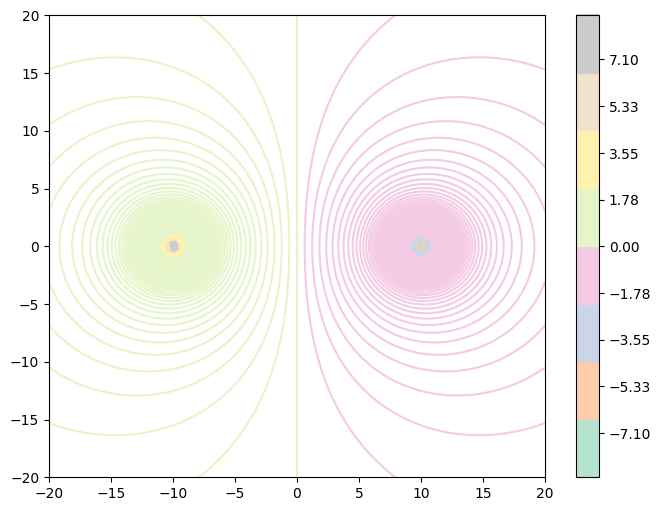

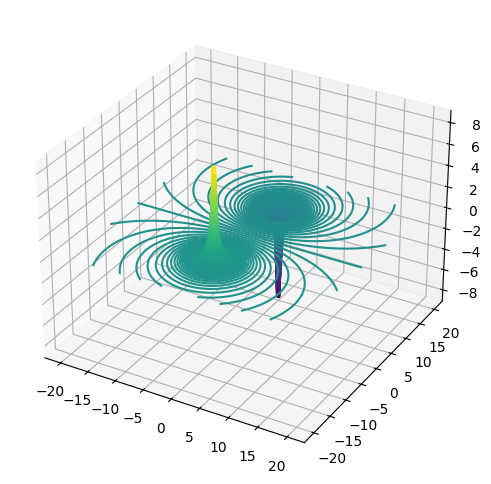

In [579]:
PlotEquipotential(start, end, numPoints, chargedPoints, charges, 700);

ValueError: x and y must have same first dimension, but have shapes (100,) and (1,)

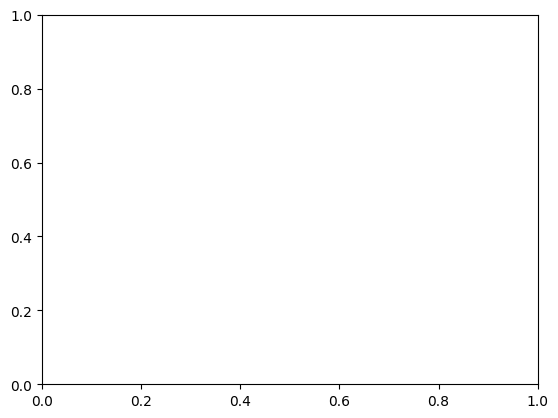

In [521]:
x = np.linspace(start, end, numPoints);
y = np.zeros(numPoints);

points = np.column_stack((x, y));
analiticPotentials = CalculatePotential(points, chargedPoints, charges);

plot.plot(x, analiticPotentials);

xAxisPotentials = [];
xAxisPoints = [];

# Filtering measured points where y = 0.
for i, point in enumerate(measuredPoints): 
    if (point[1] == 0): 
        xAxisPoints.append(point[0]);
        xAxisPotentials.append(measuredPotentials[i]);

xAxisPoints = np.array(xAxisPoints);
xAxisPotentials = np.array(xAxisPotentials);

plot.scatter(xAxisPoints, xAxisPotentials, c='k', marker='.');

a, b = LinearFit(np.column_stack((xAxisPoints, xAxisPotentials)));
plot.plot(x, a * x + b, c='g');

### Calculating Field:

In [417]:
# Calculates eletric field of an array of point-like objects considering *chargedPoints and *charges.
def CalculateField(point, chargedPoints, charges):
    eletricField = np.zeros(2);
    for i, chargedPoint in enumerate(chargedPoints):
        distanceVector = (point - chargedPoint) * 10 ** -2;
        r = np.linalg.norm(distanceVector);
        if (r == 0): eletricField = None; continue;

        direction = distanceVector / r;
        
        eletricField += charges[i] / r ** 2 * direction;

    return 1 / (4 * np.pi * eps_0) * eletricField;

In [347]:
for point in eletricFieldPoints: 
    print(CalculateField(point, chargedPoints, charges));

print(CalculateField([5, 5], chargedPoints, charges));

[8. 0.]
[2. 0.]
[0.88888889 0.        ]
[0.75894664 0.25298221]
